In [1]:
#!pip install -i https://test.pypi.org/simple/ brown-edu-dmtools==0.1.10

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ast
## plt.rcParams['text.usetex'] = True

# for legend
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


In [3]:
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolsClient
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolTestData
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import PlotTrace

In [4]:
## get api key and user id from local .env file
from dotenv import load_dotenv
import os
from os import environ, path
#BASE_DIR = path.abspath(path.dirname(__file__))
BASE_DIR = os.getcwd()
#load_dotenv(path.join(BASE_DIR, ".env"))
load_dotenv(path.join(BASE_DIR, ".env"), override=True)
MY_DMTOOLS_APIKEY = environ.get("MY_DMTOOLS_APIKEY")
MY_DMTOOLS_USERID = environ.get("MY_DMTOOLS_USERID")
Client = DMToolsClient(MY_DMTOOLS_USERID, MY_DMTOOLS_APIKEY)
#Client.request_header

In [5]:
pt = PlotTrace()

In [7]:
import json
# Define the query parameters as a dictionary
params = {
    'name_ne' : "CDMS",
    'id_ne' = 1
}

params_as_string = json.dumps(params)

# Pass the encoded query to the API client
r = Client.query(subject='plot', query_criteria=params_as_string)
r

query function encoded query string >>>  name_like%3DCDMS
query_url >>>>>>>>>>> https://dmtools.brown.edu/dmtool/fastapi_data/open/data/0.0/plot/query/?query_in=name_like%3DCDMS


[{'id': 8,
  'y_min': -44,
  'plot_png': None,
  'old_id': 22,
  'y_max': -42,
  'legend_png': None,
  'old_name': None,
  'x_units': 'GeV/c^2',
  'plot_eps': None,
  'old_user_id': None,
  'y_units': 'cm2',
  'legend_eps': None,
  'name': 'CDMS2009',
  'user_id': None,
  'no_id': 0,
  'x_min': 50,
  'created_at': '2009-08-27T07:09:21',
  'open': None,
  'x_max': 100,
  'updated_at': '2009-09-01T00:15:57',
  'subject': 'plot',
  'archived_at': '1980-01-01T00:00:00'},
 {'id': 29,
  'y_min': -54,
  'plot_png': None,
  'old_id': 69,
  'y_max': -26,
  'legend_png': None,
  'old_name': None,
  'x_units': 'GeV/c^2',
  'plot_eps': None,
  'old_user_id': None,
  'y_units': 'cm2',
  'legend_eps': None,
  'name': 'CDMS_nov2009',
  'user_id': None,
  'no_id': 0,
  'x_min': 1,
  'created_at': '2009-11-22T20:34:08',
  'open': None,
  'x_max': 10000,
  'updated_at': '2009-11-22T20:36:36',
  'subject': 'plot',
  'archived_at': '1980-01-01T00:00:00'},
 {'id': 52,
  'y_min': -44,
  'plot_png': None,
  

In [7]:
plot_id = 489
datasets = Client.read_by_plot_id(subject='data_display',id=plot_id)
datasets

[{'id': 1066,
  'subject': 'data_display',
  'name': None,
  'old_id': None,
  'old_plot_id': 775,
  'limit_id': 406,
  'plot_id': 489,
  'color': 'k',
  'style': 'line',
  'data_id': 349,
  'updated_at': '2011-10-07T17:35:05',
  'open': None}]

In [8]:
pt = PlotTrace()
#pt.set_values(trace_color, trace_style)
print(pt.mode,pt.line,pt.marker,pt.fillcolor,pt.opacity,pt.fill)

lines {'color': 'red', 'width': 1, 'dash': 'solid'} {'symbol': 'x'} rgba(0,255,255,0.05) 1 toself


In [ ]:
'''
try:
    y_rescale = float(a_data_json_obj['y_rescale'])
except:
    y_rescale = 1
try:
    x_rescale = float(a_data_json_obj['x_rescale'])
except:
    x_rescale = 1

## when do we rescale?
data_data_resp_df['cross_sections'] = data_data_resp_df['y'].astype(float).apply(lambda y: y * y_rescale)
data_data_resp_df['masses'] = data_data_resp_df['x'].astype(float).apply(lambda x: x * x_rescale)
'''

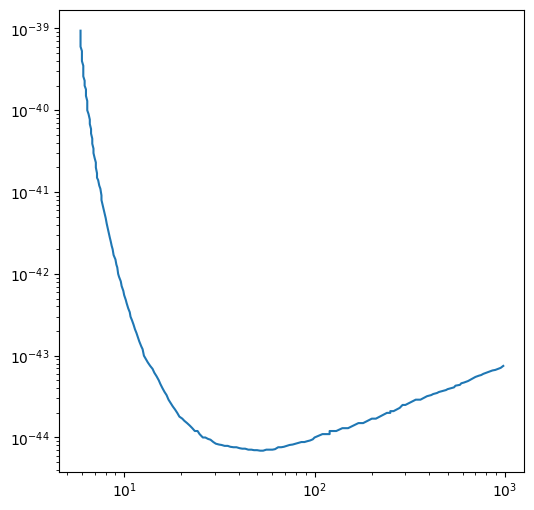

In [15]:
def get_mpl_plot(plot_id_in, width_in=600, height_in=600):
    datasets = Client.read_by_plot_id(subject='data_display',id=plot_id_in)
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.figure(figsize=(width_in*px, height_in*px))
    for d in datasets:
        data_id = d['data_id']
        trace_data = Client.read(id=data_id)
        y_rescale = float(trace_data[0]['y_rescale'])
        x_rescale = float(trace_data[0]['x_rescale'])
        trace_name = trace_data[0]['data_label']
        string_data = trace_data[0]['data']
        style = d['style']
        color = d['color']
        pt.set_values(color, style)
        list_data = ast.literal_eval(string_data)
        trace_count = len(list_data)
        trace_names_int = list(range(0,trace_count))
        trace_names_int
        trace_names = []
        for t in trace_names_int:
            trace_names.append(str(t))
            x = [item[0] for item in list_data[t]]
            y = [item[1] for item in list_data[t]]
            cross_sections =  [float(yi) * y_rescale for yi in y]
            masses =  [float(xi) * x_rescale for xi in x]
            
            if pt.fill != 'toself':
                plt.plot(masses, cross_sections, label=trace_name)
            else:
                plt.fill_between(masses, cross_sections, alpha=0.3, label=trace_name)
    
    # Add labels and title
    # plt.xlabel('Masses')
    # plt.ylabel('Cross Sections')
    
    
    #plt.title('Two Lists of Lists Plotted')
    plt.xscale('log')
    plt.yscale('log')

    return plt

my_plot = Client.get_mpl_plot(plot_id)
my_plot = get_mpl_plot(plot_id)

my_plot.show()    

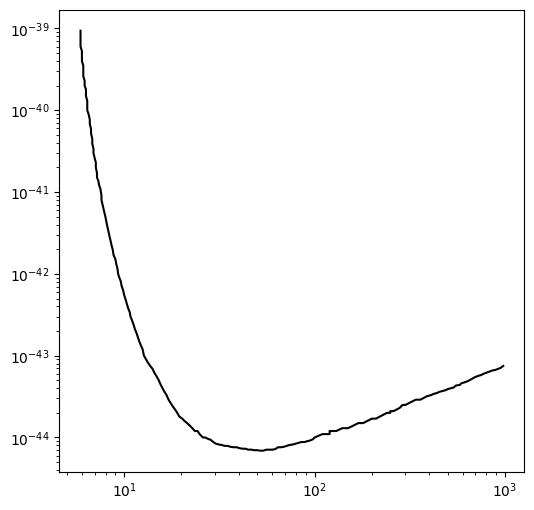

In [9]:
my_plot = Client.get_mpl_plot(489)
my_plot.show()

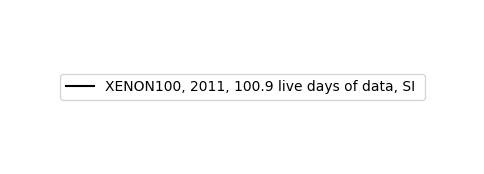

In [10]:
def get_mpl_legend(plot_id_in, width_in=600, height_in=200):
    datasets = Client.read_by_plot_id(subject='data_display',id=plot_id_in)
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.figure(figsize=(width_in*px, height_in*px))
    handles = []
    
    for d in datasets:
        data_id = d['data_id']
        trace_data = Client.read(id=data_id)
        trace_name = trace_data[0]['data_label']
        string_data = trace_data[0]['data']
        style = d['style']
        color = d['color']
        pt.set_values(color, style)
        list_data = ast.literal_eval(string_data)
        trace_count = len(list_data)
        trace_names_int = list(range(0,trace_count))
        trace_names_int
        trace_names = []
        for t in trace_names_int:
            trace_names.append(str(t))
            x = [item[0] for item in list_data[t]]
            y = [item[1] for item in list_data[t]]
            
            if pt.fill != 'toself':
                append_this = mlines.Line2D([], [], color=color, label=trace_name, linestyle='-')
            else:
                append_this = mpatches.Patch(color=color, alpha=0.3, hatch='/', label=trace_name)
            handles.append(append_this)
    
    #line1_handle = mlines.Line2D([], [], color='blue', label='Sine Wave', linestyle='-')
    #line2_handle = mlines.Line2D([], [], color='green', label='Cosine Wave', linestyle='-')
    
    #fill1_handle = mpatches.Patch(color='blue', alpha=0.3, hatch='/', label='Sine Fill')
    #fill2_handle = mpatches.Patch(color='green', alpha=0.3, hatch='\\', label='Cosine Fill')
    
    # Combine handles and labels
    #handles = [line1_handle, line2_handle, fill1_handle, fill2_handle]
    labels = [handle.get_label() for handle in handles]
    
    # Create a new figure just for the legend
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.legend(handles=handles, labels=labels, loc='center')
    ax.axis('off')  # Hide the axes
    return plt

my_legend = Client.get_mpl_legend(plot_id)

my_legend.show()    

In [11]:
# Now you can plot these two lists using matplotlib

for tl in range(0,trace_count):
    # Plot the first list as a line
    #list_data[tl]
    '''
    numpy_array = np.array(list_data[tl])
    x = numpy_array[:, 0]
    y = numpy_array[:, 1]
    '''
    x = [item[0] for item in list_data[tl]]
    y = [item[1] for item in list_data[tl]]
    
    if pt.fill != 'toself':
        plt.plot(x, y, label=str(tl))
    else:
        plt.fill_between(x, y, alpha=0.3, label='Area Trace')


# Add labels and title
plt.xlabel('Masses')
plt.ylabel('Cross Sections')


#plt.title('Two Lists of Lists Plotted')
plt.xscale('log')
plt.yscale('log')

# Show legend
#plt.legend()

# Show plot
plt.show()

NameError: name 'trace_count' is not defined

In [ ]:
'''

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Add a title and labels using mathtext
plt.title(r'This is a $\sin(x)$ function', fontsize=16)  # LaTeX-like syntax
plt.xlabel(r'$\theta$ (radians)', fontsize=14)           # LaTeX-like syntax
plt.ylabel(r'$\sin(\theta)$', fontsize=14)               # LaTeX-like syntax

# Display the plot
plt.show()
'''

In [ ]:


# Example data structure: list of list of lists
# Assuming the structure: [[[x_values_line], [y_values_line]], [[x_values_area], [y1_values_area], [y2_values_area]]]
traces = [
    [[1, 2, 3], [2, 3, 4]],        # Line trace
    [[1, 2, 3], [4, 5, 6], [1, 1, 1]],  # Area trace (with y2 values)
    [[1, 2, 3], [6, 7, 8]]         # Line trace
]

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate over traces and plot accordingly
for trace in traces:
    x_values = trace[0]
    y_values = trace[1]
    
    if len(trace) == 2:  # Line trace
        plt.plot(x_values, y_values, label='Line Trace')
    elif len(trace) == 3:  # Area trace
        y2_values = trace[2]
        plt.fill_between(x_values, y_values, y2_values, alpha=0.3, label='Area Trace')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Traces: Lines and Areas')

# Show legend
plt.legend()

# Show plot
plt.show()